## Basic Operations on Images

#### Goals
<p> • Learn to access pixel values and modify them
<p> • Learn to access image properties
<p> • Learn to setting Region of Image (ROI)
<p> • Learn to splitting and Merging images

<p>Almost all the operations in this section is mainly related to Numpy rather than OpenCV. A good knowledge of Numpy is required to write better optimized code with OpenCV.



#### Accessing and Modifying pixel values
<p>Let’s load a color image first.
<p> And you can access a pixel value by its row and column coordinates. For BGR image, it returns an array of Blue, Green, Red values. For grayscale image, just corresponding intensity is returned.


In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('img/neymar.jpg')
px = img[100,100]
print px

[50 43 56]


Accessing only blue pixel

In [12]:
blue = img[100,100,0]
print blue


50


You can modify the pixel values the same way.
<p>**Warning:** Numpy is a optimized library for fast array calculations. So simply accessing each and every pixel values and modifying it will be very slow and it is discouraged.


In [13]:
img[100,100] = [255,255,255]
print img[100,100]


[255 255 255]


**Note:** Above mentioned method is normally used for selecting a region of array, say first 5 rows and last 3 columns like
that. For individual pixel access, Numpy array methods, array.item() and array.itemset() is considered tobe better. But it always returns a scalar. So if you want to access all B,G,R values, you need to call array.item()separately for all.

Better pixel accessing and editing method :


In [14]:
# accessing RED value
img.item(10,10,2)
# modifying RED value
img.itemset((10,10,2),100)
img.item(10,10,2)

100

#### Accessing Image Properties
<p>Image properties include number of rows, columns and channels, type of image data, number of pixels etc.
Shape of image is accessed by img.shape. It returns a tuple of number of rows, columns and channels (if image is color):
<p>**Note: **If image is grayscale, tuple returned contains only number of rows and columns. So it is a good method to check if loaded image is grayscale or color image.

In [15]:
print img.shape


(360L, 640L, 3L)


Total number of pixels is accessed by img.size:


In [16]:
print img.size


691200


Image datatype is obtained by img.dtype:
<p>**Note:** img.dtype is very important while debugging because a large number of errors in OpenCV-Python code is caused by invalid datatype.



In [17]:
print img.dtype


uint8


#### Image ROI
<p> Sometimes, you will have to play with certain region of images. For eye detection in images, first perform face
detection over the image until the face is found, then search within the face region for eyes. This approach improves
accuracy (because eyes are always on faces :D ) and performance (because we search for a small area).
ROI is again obtained using Numpy indexing. Here I am selecting the ball and copying it to another region in the
image:

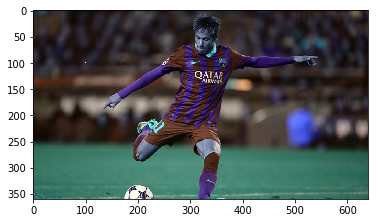

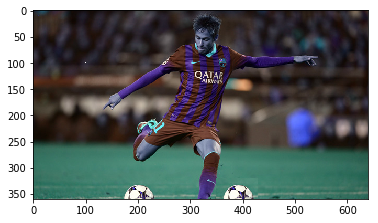

In [18]:
#ball = img[300:340, 310:390]
ball = img[320:360, 160:240]
plt.imshow(img, cmap = 'gray')
plt.show()

img2 = img
img2[320:360, 350:430] = ball
plt.imshow(img, cmap = 'gray')
plt.show()


#### Splitting and Merging Image Channels
<p>The B,G,R channels of an image can be split into their individual planes when needed. Then, the individual channels can be merged back together to form a BGR image again. This can be performed by:
<p>**Warning:** cv2.split() is a costly operation (in terms of time), so only use it if necessary. Numpy indexing is much more efficient and should be used if possible.




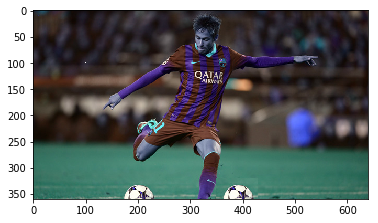

In [19]:
b,g,r = cv2.split(img)
img = cv2.merge((b,g,r))

plt.imshow(img)
plt.show()


#### Making Borders for Images (Padding)
<p>If you want to create a border around the image, something like a photo frame, you can use cv2.copyMakeBorder() function. But it has more applications for convolution operation, zero padding etc. This function takes following arguments:
<p>**• src** - input image
<p>**• top, bottom, left, right **- border width in number of pixels in corresponding directions
<p>**• borderType **- Flag defining what kind of border to be added. It can be following types:
<p>**– cv2.BORDER_CONSTANT **- Adds a constant colored border. The value should be given as next
argument.
<p>**– cv2.BORDER_REFLECT** - Border will be mirror reflection of the border elements, like this : fedcba|abcdefgh|hgfedcb
<p>**– cv2.BORDER_REFLECT_101 or cv2.BORDER_DEFAULT **- Same as above, but with a slight
change, like this : gfedcb|abcdefgh|gfedcba
<p>**– cv2.BORDER_REPLICATE **- Last element is replicated throughout, like this:
aaaaaa|abcdefgh|hhhhhhh
<p>**– cv2.BORDER_WRAP **- Can’t explain, it will look like this : cdefgh|abcdefgh|abcdefg

<p>**• value **- Color of border if border type is cv2.BORDER_CONSTANT
<p>Below is a sample code demonstrating all these border types for better understanding:



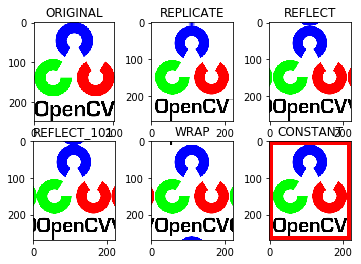

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
BLUE = [255,0,0]
img1 = cv2.imread('img/opencv_logo.png')
replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()